# 기계 학습 실기 평가

### 1. Iris 데이터에 대해서 sepal_width에 대한 회귀식을 구하고, RMSE 값을 구하시오. (sepal_length, petal_legth, petal_width 및 variety(품종)에 대한 회귀식임)

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from scipy import stats
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)
irisDF['VARIETY'] = iris.target
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),VARIETY
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
irisDF.shape

(150, 5)

In [7]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   VARIETY            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
irisDF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),VARIETY
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
import matplotlib as mpl
# MacOS 한글 설정
from matplotlib import rc
rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False

from sklearn.metrics import mean_squared_error
def single_regression(X_train,X_test,y_train,y_test):
    slr = LinearRegression()
    slr.fit(X_train.values.reshape(-1,1),y_train)
    y_pred = slr.predict(X_test.values.reshape(-1,1))     
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
    return rmse, slr.coef_[0], slr.intercept_

sepal length (cm), sepal_width RMSE : 0.48
petal length (cm), sepal_width RMSE : 0.45
petal width (cm), sepal_width RMSE : 0.45
VARIETY, sepal_width RMSE : 0.45


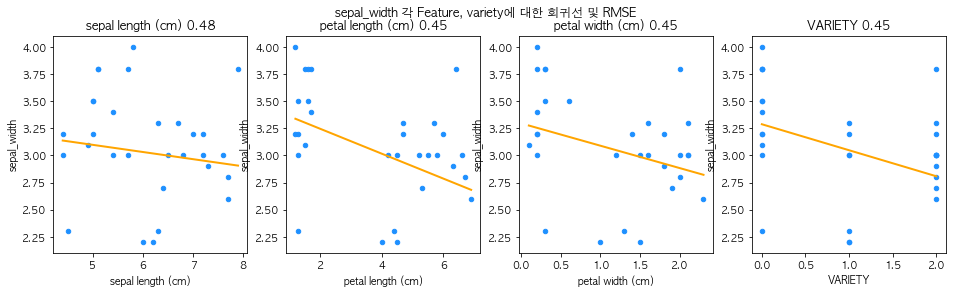

In [11]:
fig, axs = plt.subplots(figsize=(16,4), ncols=4, nrows=1)
lm_features = ['sepal length (cm)','petal length (cm)','petal width (cm)','VARIETY']
y = irisDF['sepal width (cm)']

for i, feature in enumerate(lm_features):
    X = irisDF[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2, random_state=2019)

    rmse, weight, bias = single_regression(X_train, X_test, y_train, y_test)
    
    line_x = np.array([np.min(X_test), np.max(X_test)])
    line_y = weight * line_x + bias
    
    axs[i].scatter(X_test, y_test, s=20, c='dodgerblue')
    axs[i].plot(line_x,line_y, c='orange', lw=2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('sepal_width')
    axs[i].set_title('%s %.2f'%(feature,rmse))
    
    print('%s, sepal_width RMSE : %.2f'%(feature,rmse))
    
fig.suptitle("sepal_width 각 Feature, variety에 대한 회귀선 및 RMSE")
plt.show()


### 2. 폐암 데이터(ThoraricSurgery.csv, 맨 마지막 열이 1년 생존여부임)에 대하여 SVM, 결정 트리, 로지스틱 회귀를 이용하여 1년 생존여부에 대하여 예측을 해 보고 각각의 경우에 대해서 정확도를 구하시오.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [13]:
thoraric_df = pd.read_csv('./data/ThoraricSurgery.csv',header=None)
thoraric_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [14]:
data = thoraric_df.iloc[:,:-1]
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58


In [15]:
label = thoraric_df.iloc[:,-1]
label

0      0
1      0
2      1
3      1
4      0
      ..
465    0
466    0
467    0
468    1
469    0
Name: 17, Length: 470, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, label,
                                                   test_size=0.2, shuffle=True, stratify=label, random_state=2020)

- SVM

In [17]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
pred_svc = svc.predict(X_test)

In [19]:
print('SVM의 예측 정확도는 : ', accuracy_score(y_test, pred_svc))

SVM의 예측 정확도는 :  0.851063829787234


- DecisionTreeClassifier

In [20]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
pred_dt = dt_clf.predict(X_test)

In [22]:
print('DecisionTreeClassifier의 예측 정확도는 : ', accuracy_score(y_test, pred_dt))

DecisionTreeClassifier의 예측 정확도는 :  0.723404255319149


- LogisticRegression

In [23]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
pred_lr = lr_clf.predict(X_test)

In [25]:
print('LogisticRegression의 예측 정확도는 : ', accuracy_score(y_test, pred_lr))

LogisticRegression의 예측 정확도는 :  0.8404255319148937


### 3. Iris 데이터에 대해서 2차원으로 차원 축소한 뒤, K=2, 3, 4 에 대해서 군집화를 해보고 성능을 평가하시오.

In [26]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [27]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
iris_std = StandardScaler().fit_transform(iris.data)
iris_std[:3,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [29]:
pca = PCA(n_components=2)

pca.fit(iris_std)
iris_pca = pca.transform(iris_std)
print(iris_pca.shape)

(150, 2)


In [30]:
iris_pca[:3,:]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802]])

- K=3 으로 군집화

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [32]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_pca)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [33]:
average_score = silhouette_score(iris.data, kmeans.labels_)
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))

붓꽃 데이터 세트 Silhouette Analysis Score:0.506


- K=4 로 군집화

In [34]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_pca)
kmeans.labels_

array([2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3,
       3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1], dtype=int32)

In [35]:
average_score = silhouette_score(iris.data, kmeans.labels_)
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))

붓꽃 데이터 세트 Silhouette Analysis Score:0.350


- K=2 로 군집화

In [36]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_pca)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [37]:
average_score = silhouette_score(iris.data, kmeans.labels_)
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))

붓꽃 데이터 세트 Silhouette Analysis Score:0.687


### 4. 미드웨이 영화에 대한 네이버 리뷰(midway.tsv)에서 평점이 10점인 것은 긍정으로 7 이하인 것은 부정으로 가정하고 감성 분석을 해 보시오.

In [38]:
review_df = pd.read_csv('./data/midway.tsv',
                       header=0, sep='\t', quoting=3, encoding='utf-8')
review_df.head(3)

,Unnamed: 0,평점,일시,감상평
0,0,9,2019.12.31 09:48,미드웨이가 재밌으면 추천 백두산이 재밌으면 비추
1,1,10,2019.12.31 10:41,저 해전이 있었기에 우리나라 광복도 가능 했음
2,2,10,2019.12.31 09:38,백두산 상영관 대폭줄이고 미드웨이 상영관 대폭늘려라


In [39]:
review_df = review_df.iloc[:,1:]
review_df.head(3)

,평점,일시,감상평
0,9,2019.12.31 09:48,미드웨이가 재밌으면 추천 백두산이 재밌으면 비추
1,10,2019.12.31 10:41,저 해전이 있었기에 우리나라 광복도 가능 했음
2,10,2019.12.31 09:38,백두산 상영관 대폭줄이고 미드웨이 상영관 대폭늘려라


In [40]:
review_df['평점'].astype(int)

0        9
1       10
2       10
3       10
4       10
        ..
4820     1
4821     2
4822     2
4823     4
4824     1
Name: 평점, Length: 4825, dtype: int64

- 평점을 기준으로 sentiment column 생성

In [41]:
def f(row):
    if row['평점'] > 7:
        val = 1
    else:
        val = 0
    return val

In [42]:
review_df['sentiment'] = review_df.apply(f, axis=1)

In [43]:
review_df.head(3)

,평점,일시,감상평,sentiment
0,9,2019.12.31 09:48,미드웨이가 재밌으면 추천 백두산이 재밌으면 비추,1
1,10,2019.12.31 10:41,저 해전이 있었기에 우리나라 광복도 가능 했음,1
2,10,2019.12.31 09:38,백두산 상영관 대폭줄이고 미드웨이 상영관 대폭늘려라,1


In [44]:
review_df.tail(3)

,평점,일시,감상평,sentiment
4822,2,2020.01.01 23:40,시간이 아까워요. 엉성한 그래서 감동도 교훈도 없는...ㅉㅉ,0
4823,4,2019.12.31 15:37,"진주만보다 낫다고해서봤는데대실망...천조국,왜놈들 국뽕영화",0
4824,1,2020.01.16 23:51,우리는 왜 이런 영화 못만드냐? 싸구려 좌파 찌라시 백x산이나 대놓고 친북사상 반일...,0


In [45]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4825 entries, 0 to 4824
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   평점         4825 non-null   int64 
 1   일시         4825 non-null   object
 2   감상평        4316 non-null   object
 3   sentiment  4825 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 150.9+ KB


In [46]:
review_df.dropna(inplace=True)

In [47]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4316 entries, 0 to 4824
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   평점         4316 non-null   int64 
 1   일시         4316 non-null   object
 2   감상평        4316 non-null   object
 3   sentiment  4316 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 168.6+ KB


In [48]:
class_df = review_df['sentiment']
feature_df = review_df['감상평']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.2, random_state=2020)
X_train.shape, X_test.shape

((3452,), (864,))

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer()
X_train_cvect = cvect.fit_transform(X_train,y_train)

tvect = TfidfVectorizer()
X_train_tvect = tvect.fit_transform(X_train,y_train)

In [51]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(C = 10,n_jobs=-1)
lr_clf.fit(X_train_tvect, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
X_test_tvect = tvect.transform(X_test)
pred = lr_clf.predict(X_test_tvect)

In [53]:
from sklearn.metrics import accuracy_score, roc_auc_score
print('TfidfVectorizer와 LogisticRegression을 사용한 감성 분석 결과 정확도 : ',accuracy_score(y_test, pred))

TfidfVectorizer와 LogisticRegression을 사용한 감성 분석 결과 정확도 :  0.8611111111111112
